In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Use the logistic regression (multi class; implemented from scratch) training algorithm and plot the training and test errors.

In [2]:
tra_df = pd.read_csv('optdigits.tra', header=None, sep=',')
tes_df = pd.read_csv('optdigits.tes', header=None, sep=',')
tra_lbl = tra_df.pop(64)
tes_lbl = tes_df.pop(64)

In [3]:
def standardScaler(feature_array):
    total_cols = feature_array.shape[1] # total number of columns 
    for i in range(total_cols): # iterating through each column
        feature_col = feature_array[i]
        mean = feature_col.mean() # mean stores mean value for the column
        std = feature_col.std() # std stores standard deviation value for the column
        if(std==float(0)):
            std=1
        feature_array[i] = (feature_array[i] - mean) / std
        
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))


def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return loss


def gradients(X, y, y_hat,w=None,Lambda=None):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    # Lambda - Regularization parameter    
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    if(Lambda==None):
        dw = (1/m)*np.dot(X.T, (y_hat - y))
    else:
        dw = (1/m)*(np.dot(X.T, (y_hat - y)) + Lambda*w)
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def train(X_train, y_train,X_test,y_test, epochs, lr,Lambda=None):
    
    # X_train --> Training Input.
    # y_train --> Training true/target value.
    # X_test --> Testing Input.
    # y_test --> Testing true/target value.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # Initializing weights and bias to zeros.
    w = np.zeros((X_train.shape[1],1))
    b = 0
    
    # Reshaping y.
    y_train = y_train.reshape(X_train.shape[0],1)
    y_test = y_test.reshape(X_test.shape[0],1)
    # Normalizing the inputs.
    
    # Empty list to store losses.
    train_losses,test_losses = [],[]
    
    # Training loop.
    for epoch in range(epochs):

        # Calculating hypothesis/prediction.
        y_hat = sigmoid(np.dot(X_train, w) + b)
        # Getting the gradients of loss w.r.t parameters.
        dw, db = gradients(X_train, y_train, y_hat,w,Lambda)

        # Updating the parameters.
        w -= lr*dw
        b -= lr*db
        
        # Calculating loss and appending it in the list.
        l_train = loss(y_train, y_hat)
        l_test = loss(y_test, sigmoid(np.dot(X_test, w) + b))
        train_losses.append(l_train)
        test_losses.append(l_test)
        
    # returning weights, bias and losses(List).
    return w, b, train_losses,test_losses

def predict(X,w,b):
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class),np.array(preds.reshape(1,-1)[0])

def convert_labels(train_label,test_label):
    n_class = np.unique(train_label)
    train_labels,test_labels = [],[]
    for i in n_class:
        train_labels.append(np.where(train_label == i, 1, 0))
        test_labels.append(np.where(test_label == i, 1, 0))
    return train_labels,test_labels
        

In [4]:
# Scaling the Training and test Dataset
standardScaler(tra_df)
standardScaler(tes_df)

# Building label data sets for each class to build 0-1 Logistic Regression models.
train_labels,test_labels = convert_labels(tra_lbl,tes_lbl)

In [5]:
# Training 
model_w,model_b = [],[]
num_epoch = 1000
train_loss,test_loss = np.zeros((num_epoch, 10)),np.zeros((num_epoch, 10))
for i in np.unique(tra_lbl):
    w, b, train_l,test_l = train(tra_df, train_labels[i],tes_df,test_labels[i], epochs=num_epoch, lr=0.01)
    model_w.append(w)
    model_b.append(b)
    train_loss[:, i] = train_l
    test_loss[:, i] = test_l
training_losses = np.mean(train_loss, axis = 1)
testing_losses = np.mean(test_loss, axis = 1)


In [6]:
#Prediction
train_preds,test_preds = pd.DataFrame(),pd.DataFrame()
for i in np.unique(tra_lbl):
    _,train_preds[i] = predict(tra_df,model_w[i],model_b[i])
    _,test_preds[i] = predict(tes_df,model_w[i],model_b[i])

In [7]:
#Train error and Test error
from sklearn.metrics import accuracy_score

train_accuracy=accuracy_score(tra_lbl, train_preds.idxmax(axis=1))*100
test_accuracy=accuracy_score(tes_lbl, test_preds.idxmax(axis=1))*100
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  94.1145697096521
Test Accuracy:  91.81969949916528


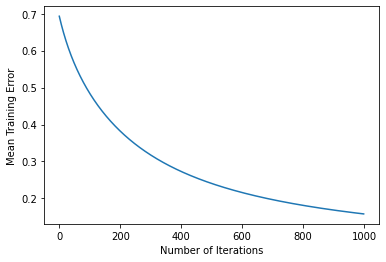

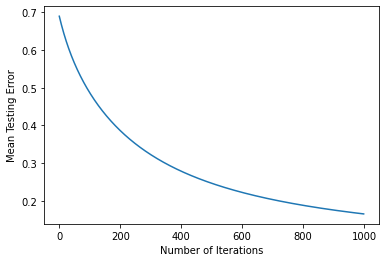

In [8]:
# Plotting Training Error and Test Error per epochs.
plt.plot(range(num_epoch), training_losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Training Error')
plt.show()

plt.plot(range(num_epoch), testing_losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Testing Error')
plt.show()


## Use the logistic regression classifier with regularization so that you also penalize large weights (λ∥w∥2). Plot the average training and test errors for at least 5 different values of regularization parameter λ.

Train Accuracy :  95.5793879152498 With regularization : 0.0001
Test Accuracy:  93.43350027824151 With regularization : 0.0001
Train Accuracy :  95.5793879152498 With regularization : 0.001
Test Accuracy:  93.43350027824151 With regularization : 0.001
Train Accuracy :  95.5793879152498 With regularization : 0.01
Test Accuracy:  93.43350027824151 With regularization : 0.01
Train Accuracy :  95.5793879152498 With regularization : 0.05
Test Accuracy:  93.43350027824151 With regularization : 0.05
Train Accuracy :  95.5793879152498 With regularization : 0.1
Test Accuracy:  93.43350027824151 With regularization : 0.1


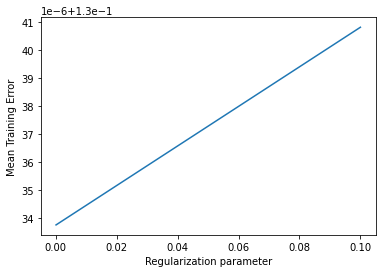

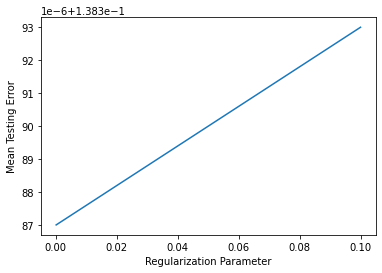

In [9]:


reg_values = [0.0001, 0.001, 0.01, 0.05, 0.1]
reg_training_loss_list = []
reg_testing_loss_list = []

num_epoch=5000
for val in reg_values:
    model_w,model_b,model_l = [],[],[]
    train_loss,test_loss = np.zeros((num_epoch, 10)),np.zeros((num_epoch, 10))
    for i in np.unique(tra_lbl):
        w, b, train_l,test_l = train(tra_df, train_labels[i],tes_df,test_labels[i], epochs=num_epoch, lr=0.01,Lambda=val)
        model_w.append(w)
        model_b.append(b)
        train_loss[:, i] = train_l
        test_loss[:, i] = test_l

    training_losses = np.mean(np.mean(train_loss, axis = 1))
    testing_losses = np.mean(np.mean(test_loss, axis = 1))
    reg_training_loss_list.append(training_losses)
    reg_testing_loss_list.append(testing_losses)

    train_preds,test_preds = pd.DataFrame(),pd.DataFrame()
    for i in np.unique(tra_lbl):
        _,train_preds[i] = predict(tra_df,model_w[i],model_b[i])
        _,test_preds[i] = predict(tes_df,model_w[i],model_b[i])

    train_accuracy=accuracy_score(tra_lbl, train_preds.idxmax(axis=1))*100
    test_accuracy=accuracy_score(tes_lbl, test_preds.idxmax(axis=1))*100
    print("Train Accuracy : ",train_accuracy, "With regularization :", val)
    print("Test Accuracy: ", test_accuracy, "With regularization :", val)
    
plt.figure()
plt.plot(reg_values, reg_training_loss_list)
plt.xlabel('Regularization parameter')
plt.ylabel('Mean Training Error')
plt.show()

plt.plot(reg_values, reg_testing_loss_list)
plt.xlabel('Regularization Parameter')
plt.ylabel('Mean Testing Error')
plt.show()
    
